In [1]:
import pandas as pd # Data processing, read_csv
import numpy as np # Linear Algebra

# Libraries for visualizations.
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8')
import seaborn as sns
import plotly.express as px
import altair as alt

# Importing required libraries from datetime
from datetime import date
from datetime import datetime

# Importing libraries for time series plots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Importing Holidays
import holidays

# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data.

df_aapl=pd.read_csv("AAPL.csv")

In [3]:
df_aapl.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

In [4]:
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [5]:
df_aapl.shape

(2011, 7)

# <span style=color:purple>Data Preprocessing</span>

## <span style="color:blue">We see that the Date is in object datatype, for a time series analysis we need to convert it to a ***datetime64[ns]*** datatype and set it as Index.</span>

In [6]:
df_aapl['Date']=df_aapl['Date'].astype('datetime64[ns]',errors='ignore')

In [7]:
df_aapl.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
# To get list of holidays
holiday_list=[]
years=[2012,2013,2014,2015,2016,2017,2018,2019]
for holiday in holidays.UnitedStates(years=years).items():
    holiday_list.append(holiday)
pd.set_option('display.max_rows',100)
df_holidays=pd.DataFrame(holiday_list,columns=['Date','Holiday'])
df_holidays['Date'] = df_holidays['Date'].astype('datetime64[ns]')
df_holidays.sort_values(by='Date',inplace=True)
df_holidays.set_index('Date',inplace=True)
df_holidays

Holiday
Date                                   
2012-01-01               New Year's Day
2012-01-02    New Year's Day (Observed)
2012-01-16   Martin Luther King Jr. Day
2012-02-20        Washington's Birthday
2012-05-28                 Memorial Day
2012-07-04             Independence Day
2012-09-03                    Labor Day
2012-10-08                 Columbus Day
2012-11-11                 Veterans Day
2012-11-12      Veterans Day (Observed)
2012-11-22                 Thanksgiving
2012-12-25                Christmas Day
2013-01-01               New Year's Day
2013-01-21   Martin Luther King Jr. Day
2013-02-18        Washington's Birthday
2013-05-27                 Memorial Day
2013-07-04             Independence Day
2013-09-02                    Labor Day
2013-10-14                 Columbus Day
2013-11-11                 Veterans Day
2013-11-28                 Thanksgiving
2013-12-25                Christmas Day
2014-01-01               New Year's Day
2014-01-20   Martin Luther King Jr. Day
2014-02-17        Washington's Birthday
2014-05-26                 Memorial Day
2014-07-04             Independence Day
2014-09-01                    Labor Day
2014-10-13                 Columbus Day
2014-11-11                 Veterans Day
2014-11-27                 Thanksgiving
2014-12-25                Christmas Day
2015-01-01               New Year's Day
2015-01-19   Martin Luther King Jr. Day
2015-02-16        Washington's Birthday
2015-05-25                 Memorial Day
2015-07-03  Independence Day (Observed)
2015-07-04             Independence Day
2015-09-07                    Labor Day
2015-10-12                 Columbus Day
2015-11-11                 Veterans Day
2015-11-26                 Thanksgiving
2015-12-25                Christmas Day
2016-01-01               New Year's Day
2016-01-18   Martin Luther King Jr. Day
2016-02-15        Washington's Birthday
2016-05-30                 Memorial Day
2016-07-04             Independence Day
2016-09-05                    Labor Day
2016-10-10                 Columbus Day
2016-11-11                 Veterans Day
2016-11-24                 Thanksgiving
2016-12-25                Christmas Day
2016-12-26     Christmas Day (Observed)
2017-01-01               New Year's Day
2017-01-02    New Year's Day (Observed)
2017-01-16   Martin Luther King Jr. Day
2017-02-20        Washington's Birthday
2017-05-29                 Memorial Day
2017-07-04             Independence Day
2017-09-04                    Labor Day
2017-10-09                 Columbus Day
2017-11-10      Veterans Day (Observed)
2017-11-11                 Veterans Day
2017-11-23                 Thanksgiving
2017-12-25                Christmas Day
2018-01-01               New Year's Day
2018-01-15   Martin Luther King Jr. Day
2018-02-19        Washington's Birthday
2018-05-28                 Memorial Day
2018-07-04             Independence Day
2018-09-03                    Labor Day
2018-10-08                 Columbus Day
2018-11-11                 Veterans Day
2018-11-12      Veterans Day (Observed)
2018-11-22                 Thanksgiving
2018-12-25                Christmas Day
2019-01-01               New Year's Day
2019-01-21   Martin Luther King Jr. Day
2019-02-18        Washington's Birthday
2019-05-27                 Memorial Day
2019-07-04             Independence Day
2019-09-02                    Labor Day
2019-10-14                 Columbus Day
2019-11-11                 Veterans Day
2019-11-28                 Thanksgiving
2019-12-25                Christmas Day

## <span style=color:purple>Days when Stocks were traded.</span>

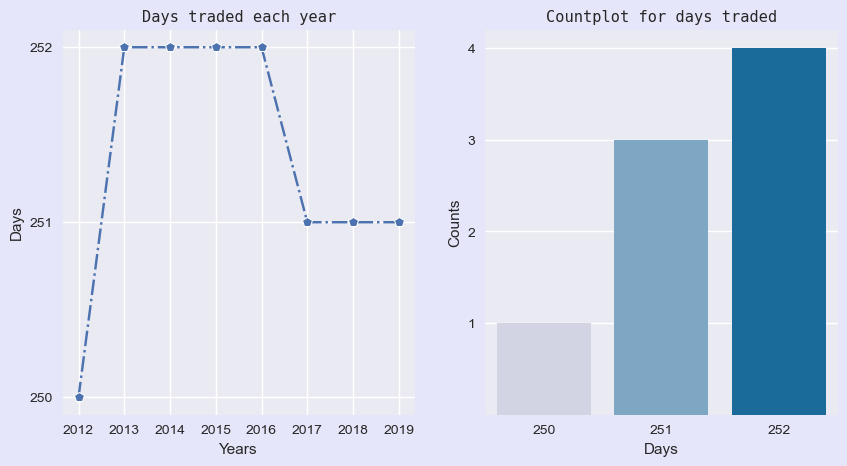

In [9]:
# To get the count of years by sorting them.
df1=df_aapl.copy()
df1['Year']=df1['Date'].dt.year
a=list(df1['Year'].value_counts().sort_values())

# To sort the number of days traded each year.
dt=df1['Year'].value_counts().to_frame()
dt=dt.reset_index()
dt=dt.sort_values(by='index')
dt=dt.set_index('index')
dt.index.names=['Year']
dt.rename(columns={'Year':'Days'},inplace=True)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5),facecolor='lavender')

sns.lineplot(dt.Days,ax=ax[0],marker='p',linestyle='-.')
ax[0].set_xlabel('Years')
ax[0].set_yticks([250,251,252])
ax[0].set_title('Days traded each year',family='monospace',fontsize=11)


sns.countplot(x=a,data=df1,ax=ax[1],palette='PuBu');
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Counts')
ax[1].set_yticks([1,2,3,4])
ax[1].set_title('Countplot for days traded',family='monospace',fontsize=11)

plt.show()

### <span style=color:blue>The number of trading days in US is 252 days.</span>

### <span style=color:blue>The above plot gives us insight of the number of days traded.</span>

In [10]:
# Setting the Date as Index.

df_aapl.set_index("Date",inplace=True)

# <span style=color:purple>Creating custom business days</span>

In [11]:
# Generate a time series that considers all the holidays.

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Creating the custom business Days.
usb=CustomBusinessDay(calendar=USFederalHolidayCalendar())
b_range=pd.date_range('3/1/2012','30/12/2019',freq=usb)

In [12]:
# To get date of holidays over years.

diff_range=b_range.difference(df_aapl.index)
print(diff_range) 

DatetimeIndex(['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
               '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
               '2018-03-30', '2018-12-05', '2019-04-19'],
              dtype='datetime64[ns]', freq=None)


In [13]:
# Creating the custom frequency

C=CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', '2013-03-29',
                                                                '2014-04-18', '2015-04-03', '2016-03-25', '2017-04-14',
                                                                '2018-03-30', '2018-12-05', '2019-04-19'])

In [14]:
# To know any holidays are there for our Custom Frequency.
my_range=pd.date_range(start='2012-01-03',end='2019-12-30',freq=C)
print(my_range.difference(df_aapl.index))

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [15]:
# Setting the frequency as C

df_aapl=df_aapl.asfreq('C')

## <span style=color:magenta>_C_ is the frequency that includes holidays other than frequency</span>

In [16]:
day1=df_aapl.index[0].date()
day2=df_aapl.index[-1].date()
delta=day2-day1
bdays=len(pd.bdate_range((day1),(day2)))
print("The number of days from {} to {} are {} days out of which {} days stocks were traded.\n".format(day1,day2,delta.days,df_aapl.shape[0]))
print("The number of business days from {} to {} are {}.".format(day1,day2,bdays))

The number of days from 2012-01-03 to 2019-12-30 are 2918 days out of which 2085 days stocks were traded.

The number of business days from 2012-01-03 to 2019-12-30 are 2085.


# <span style=color:purple>Time Series Analysis</span>

In [17]:
df_aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# The Columns are interpreted as:


### <span style="color:blue">**1. Open:</span> <span style="color:green">The first trade price on Date.**</span>


### <span style="color:blue">**2. High:</span> <span style='color:green'>The highest price at which the stock is traded on Date.**</span>


### <span style="color:blue">**3. Low:</span> <span style='color:green'>The lowest price at which the stock is traded on Date.**</span>


### <span style="color:blue">**4. Close:</span> <span style='color:green'>The last trade price on Date.**</span>


### <span style="color:blue">**5. Adj Close:</span> <span style='color:green'>This is defined as the closing price after all dividends are split.**</span>


### <span style="color:blue">**6. Volume:</span> <span style='color:green'>The number of shares traded on Date.**</span>

In [18]:
df_aapl.rename(columns={'Adj Close':'Adj_Close'},inplace=True)

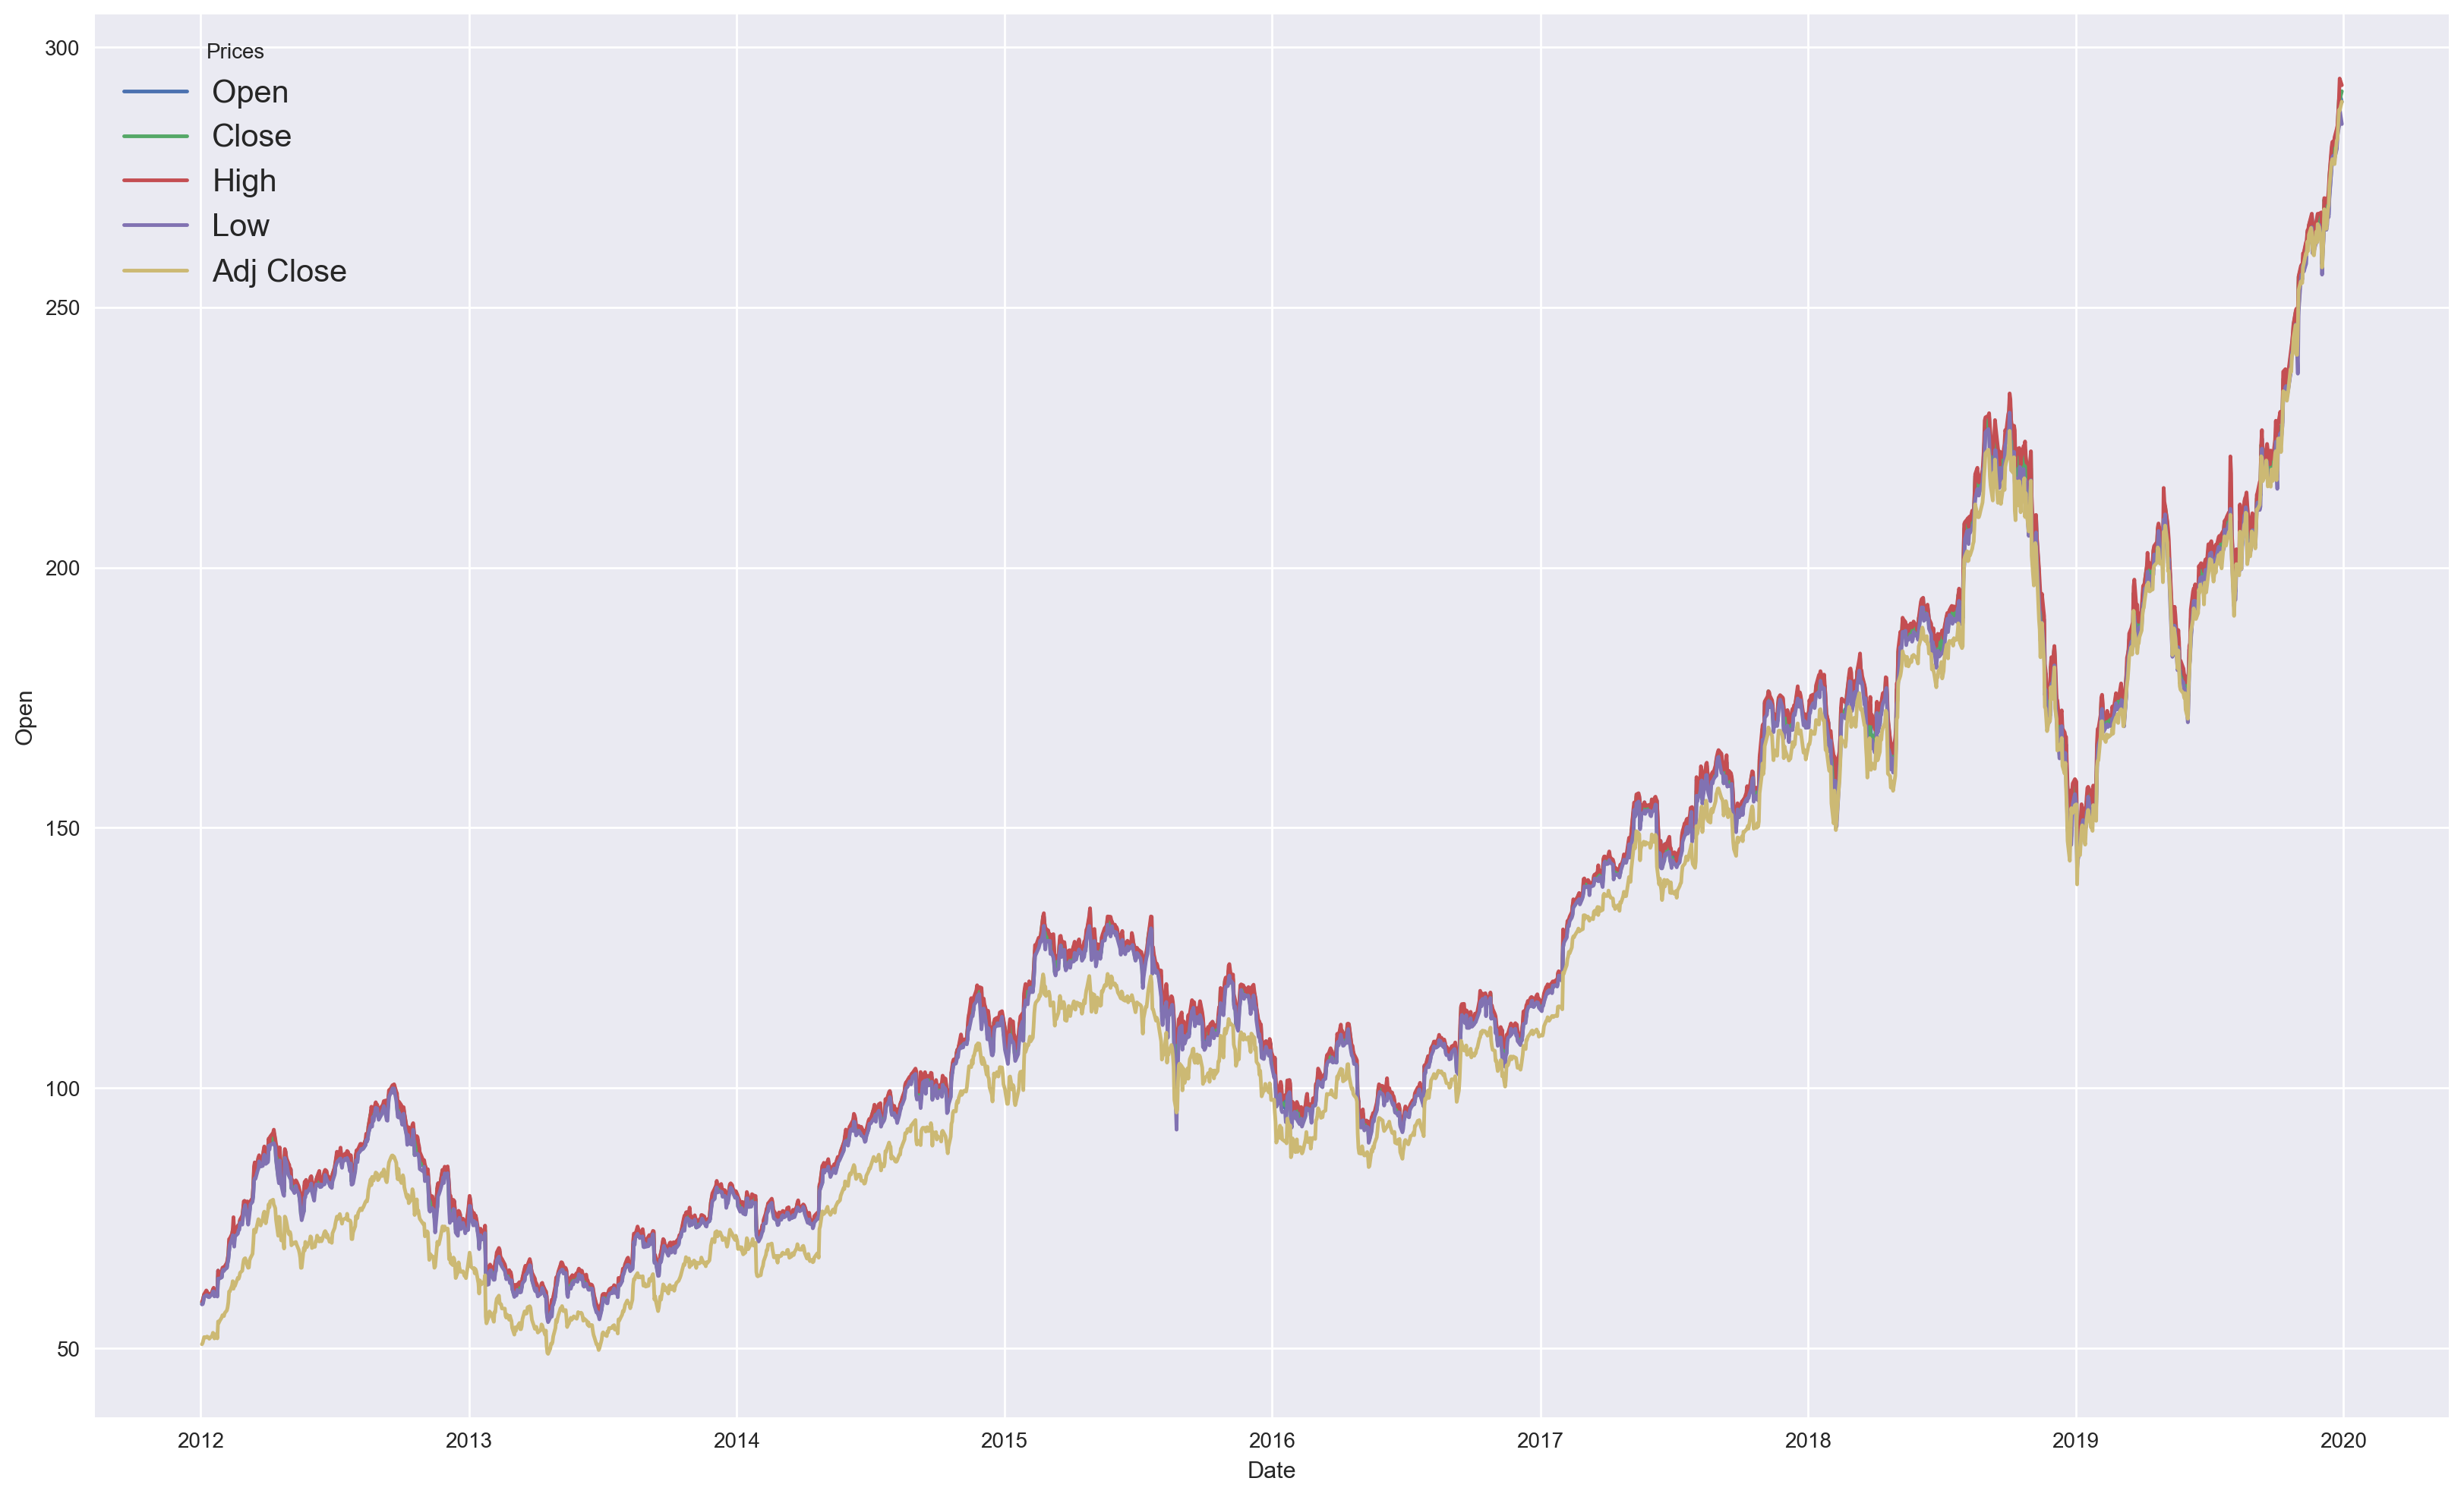

In [19]:
fig, axes = plt.subplots(figsize=(20,12),dpi=200)

ax=sns.lineplot(df_aapl['Open'],label='Open')
sns.lineplot(df_aapl['Close'],label='Close')
sns.lineplot(df_aapl['High'],label='High')
sns.lineplot(df_aapl['Low'],label='Low')
sns.lineplot(df_aapl['Adj_Close'],label='Adj Close')
plt.legend(loc='best',title='Prices',fontsize=15)
plt.show()

In [20]:
df_aapl.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-16',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2085, freq='C')

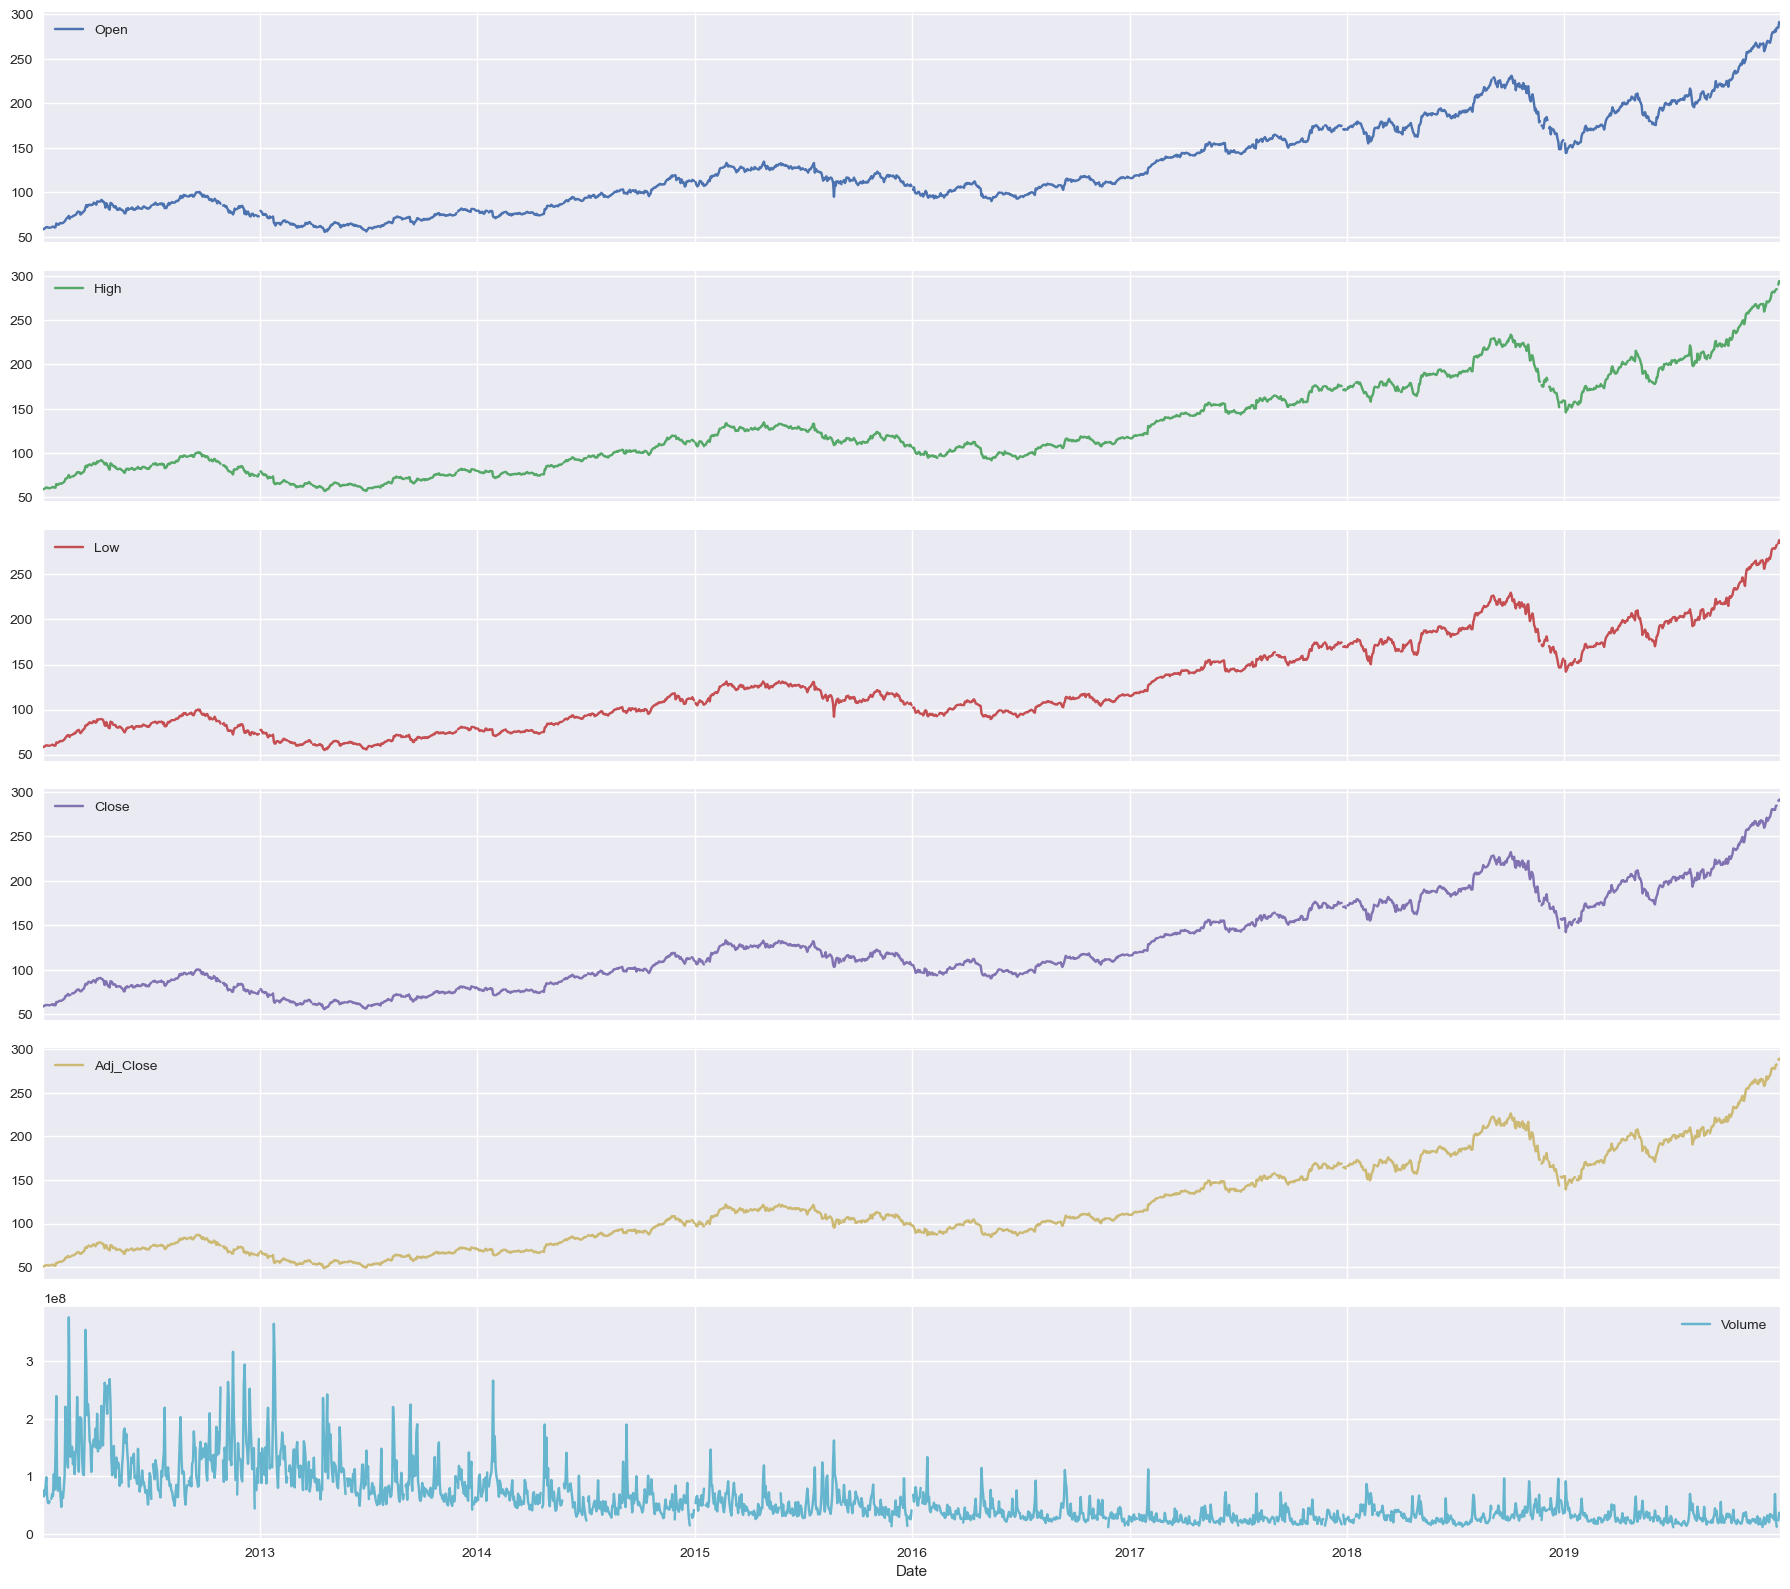

In [21]:
df_aapl.plot(subplots=True,figsize=(18,16))
plt.tight_layout()
plt.legend(loc='best')
plt.show()

## <span style=color:blue>Let us see the relationship between the _Closing Price_ and _Volume_ of the shares traded.</span>

In [22]:
def plot_df(df_aapl,x,y,title="",xlabel='Date',ylabel="Prices",dpi=100):
  plt.figure(figsize=(10,6),dpi=dpi)
  plt.plot(x,y,color='tab:red')
  plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
  plt.show()

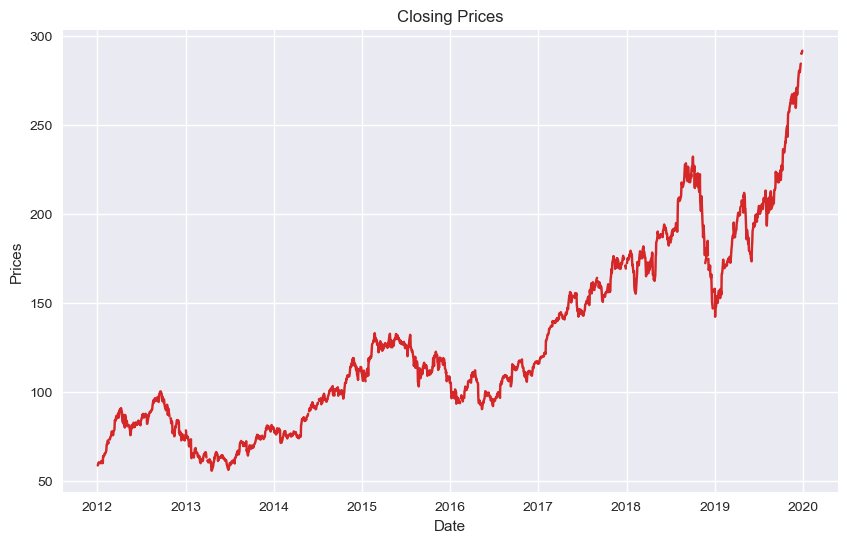

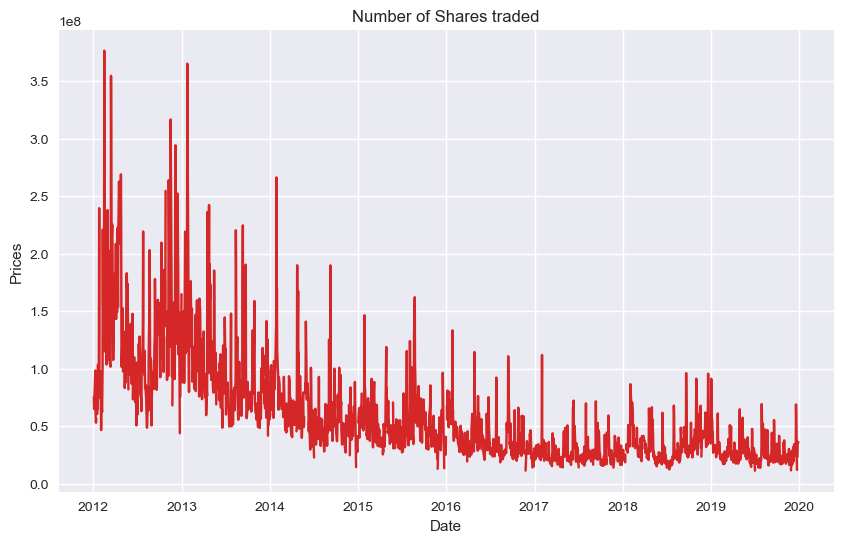

In [23]:
# Plotting Closing Prices.
plot_df(df_aapl,x=df_aapl.index,y=df_aapl.Close,title="Closing Prices")

# Plotting Volume traded.
plot_df(df_aapl,x=df_aapl.index,y=df_aapl.Volume,title="Number of Shares traded")

### <span style=color:blue>1. _We see that volume traded and closing price have an inverse relationship. This relationship is common practice in finance._</span> 

### <span style=color:blue>2. _If the closing price of a stock decreases, people are more likely to trade a particular stock. We see that the data is very spiky. This spikiness is because there is a sutble market forces that guide the price fluctuations_.</span>

# <span style=color:purple>OLHC plot</span>

###  <span style=color:magenta>1. We can use an OLHC chart to visualize the data. The OLHC (Open, High, Low and Close) chart is a financial chart describing open, high, low and close values for a given date.</span>

###  <span style=color:magenta>2. The horizontal segments represent open and close values, and the tip of the line represents the low and high values. Points, where the close value is higher than open are called increasing (in green) and decreasing close value is lower than open (in red).</span>

In [24]:
# OLHC plot using plotly.

import plotly.graph_objects as go
fig=go.Figure(data=go.Ohlc(x=df_aapl.index,open=df_aapl['Open'],
                           high=df_aapl['High'],
                           low=df_aapl['Low'],
                           close=df_aapl['Close']))
fig.show()

In [25]:
data_feature_selected=df_aapl.drop(labels=['Open','Close','Low','High','Volume'],axis=1)
df=data_feature_selected
df

Adj_Close
Date                  
2012-01-03   50.765709
2012-01-04   51.038536
2012-01-05   51.605175
2012-01-06   52.144630
2012-01-09   52.061932
...                ...
2019-12-24  282.322266
2019-12-25         NaN
2019-12-26  287.923645
2019-12-27  287.814392
2019-12-30  289.522614

[2085 rows x 1 columns]

In [26]:
df.reset_index(inplace=True)
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df

Date   Adj_Close  Year     Month
0    2012-01-03   50.765709  2012   January
1    2012-01-04   51.038536  2012   January
2    2012-01-05   51.605175  2012   January
3    2012-01-06   52.144630  2012   January
4    2012-01-09   52.061932  2012   January
...         ...         ...   ...       ...
2080 2019-12-24  282.322266  2019  December
2081 2019-12-25         NaN  2019  December
2082 2019-12-26  287.923645  2019  December
2083 2019-12-27  287.814392  2019  December
2084 2019-12-30  289.522614  2019  December

[2085 rows x 4 columns]

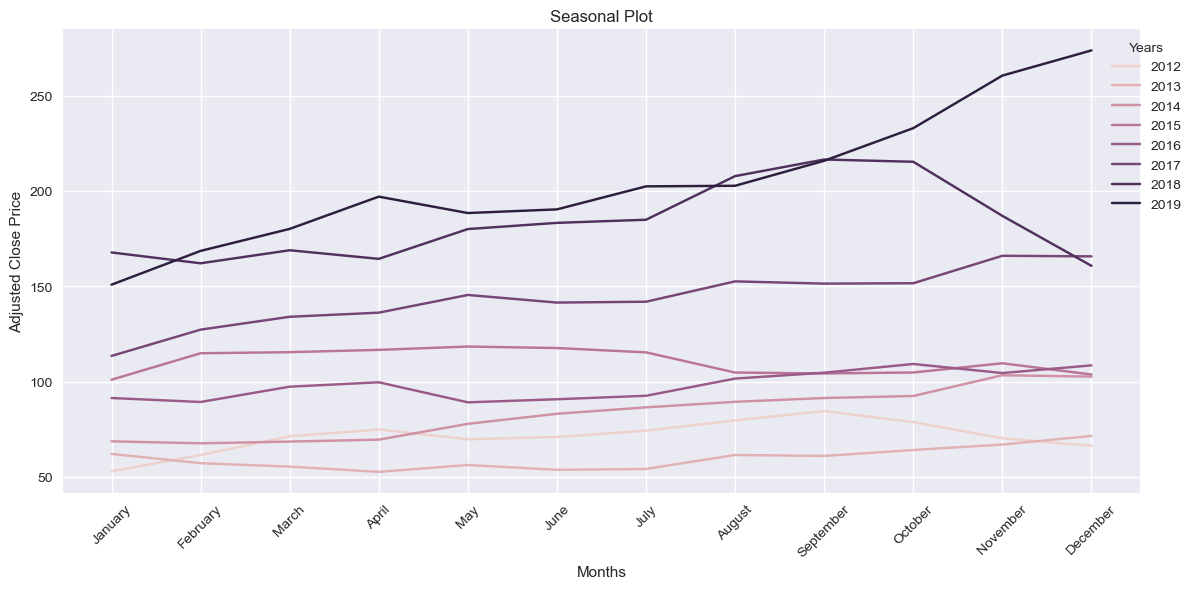

In [27]:
# Seasonal plot

sns.set_palette("husl")
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Month',y='Adj_Close',hue='Year',legend='full',ci=None)
plt.title('Seasonal Plot')
plt.xlabel('Months')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=1,title='Years');
plt.tight_layout()

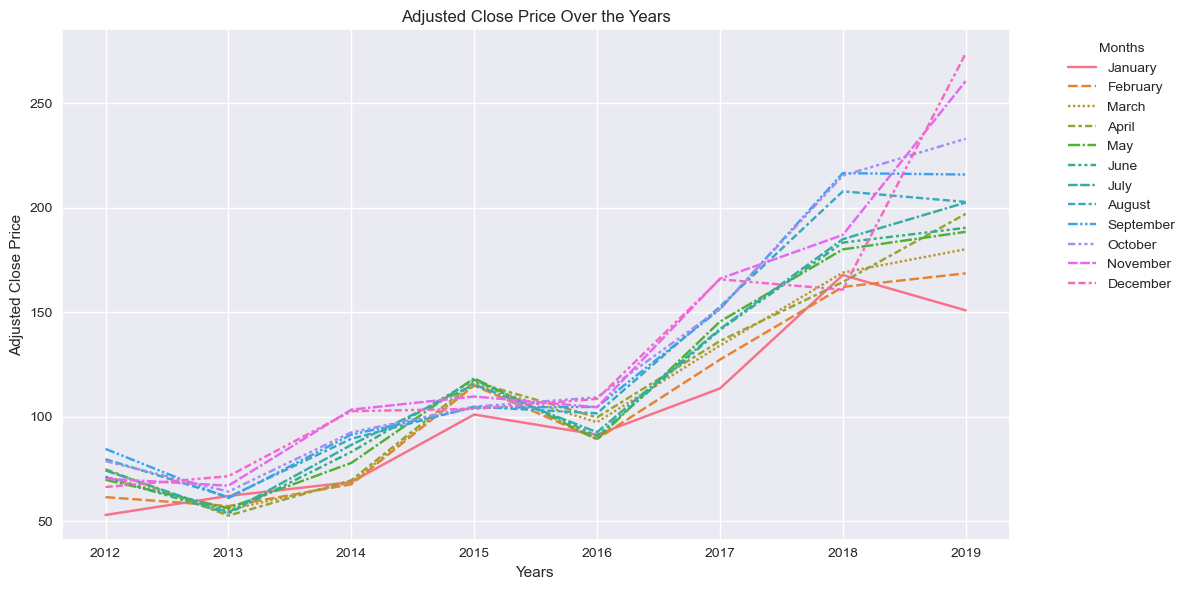

In [28]:
# Adjusted Close Prices over the Years.

plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Year',y='Adj_Close',hue='Month',style='Month',legend='full',ci=None)
plt.title('Adjusted Close Price Over the Years')
plt.xlabel('Years')
plt.ylabel('Adjusted Close Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,title='Months');
plt.tight_layout()

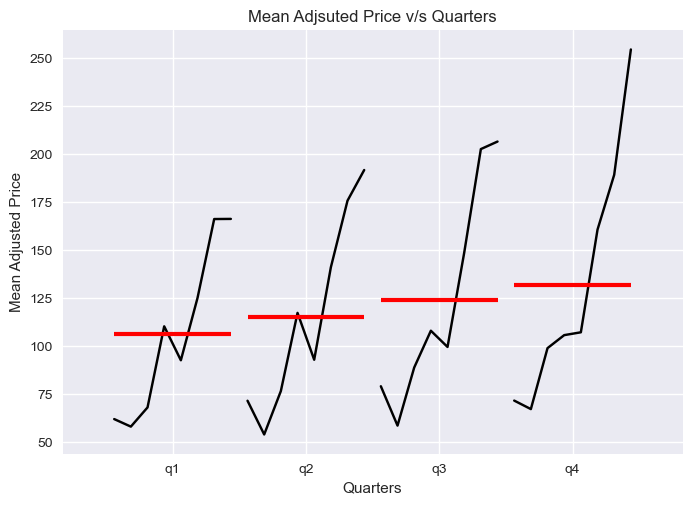

In [29]:
# Using quarter_plot to plot the mean of the prices.

df.set_index('Date',inplace=True)
quarter_plot(df['Adj_Close'].resample('Q').mean())
plt.title('Mean Adjsuted Price v/s Quarters')
plt.xlabel('Quarters')
plt.ylabel('Mean Adjusted Price')
plt.show()

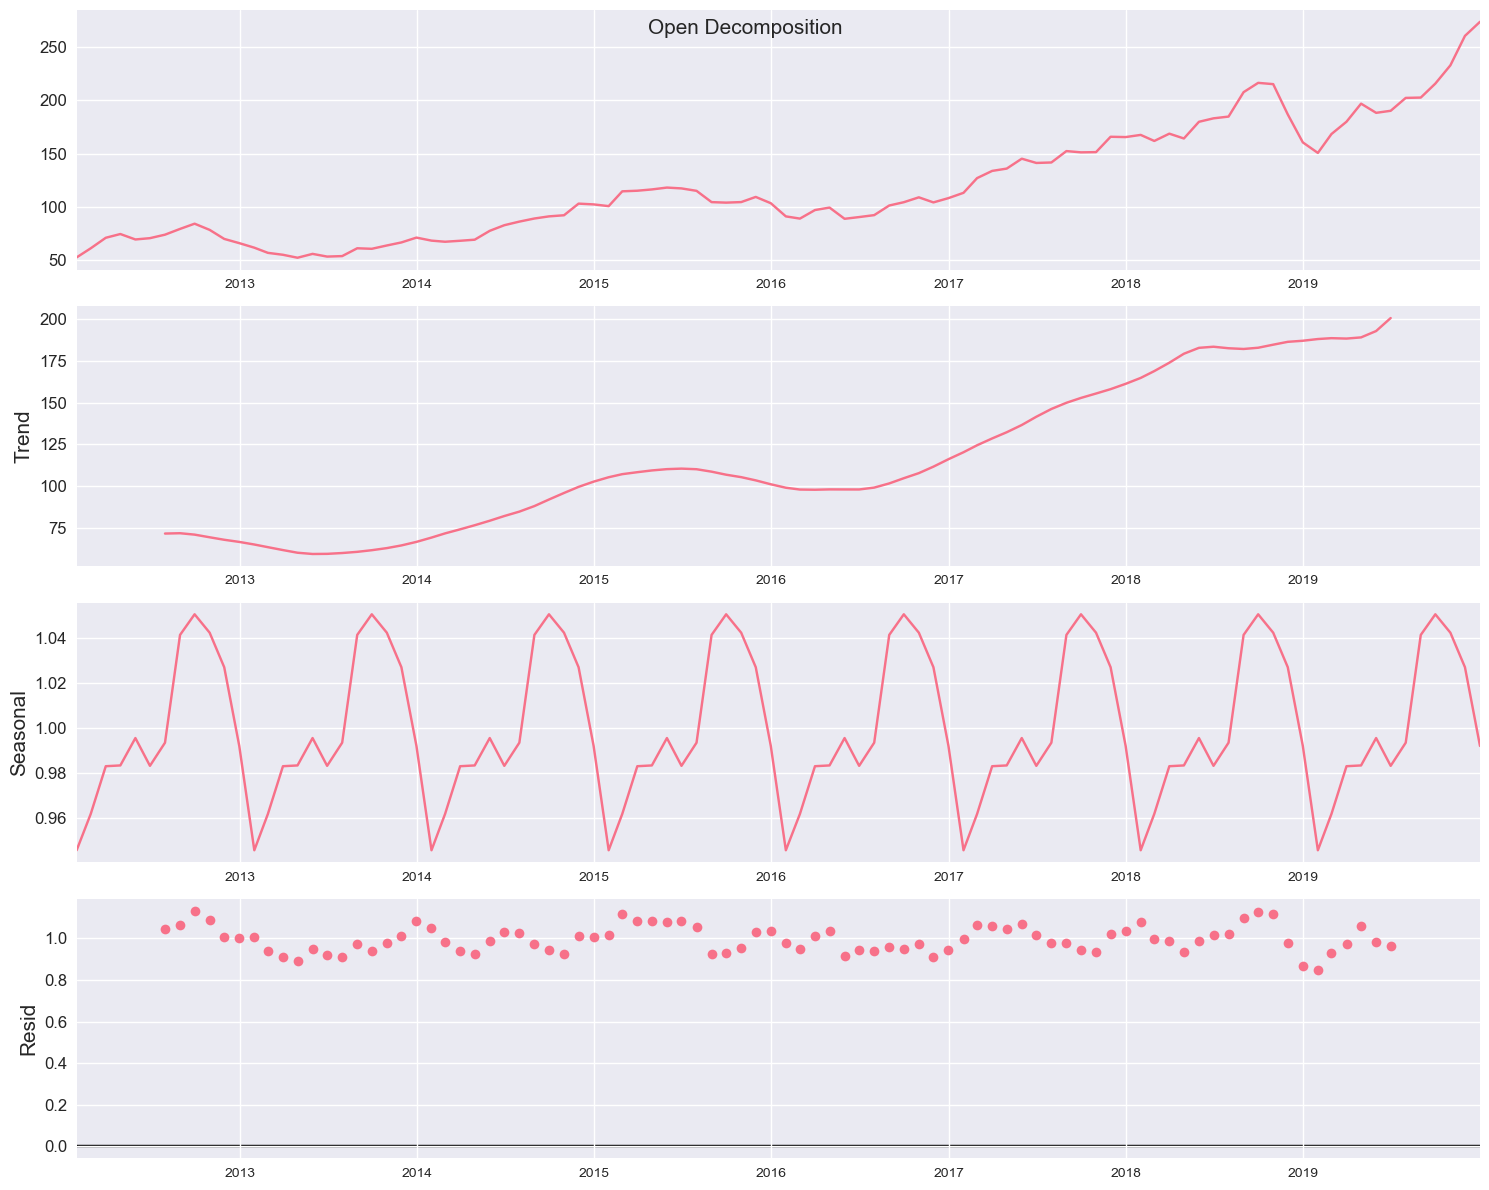

In [30]:
# To plot the Trend, seasonal and Noise components of the time series data.

y=df[['Adj_Close']].copy()
y.index=pd.to_datetime(y.index)
y=y.resample('1M').mean()

rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 10

decomposition=seasonal_decompose(y,model='multiplicative')
decomp=decomposition.plot()
decomp.suptitle('Open Decomposition',fontsize=15)
plt.show()

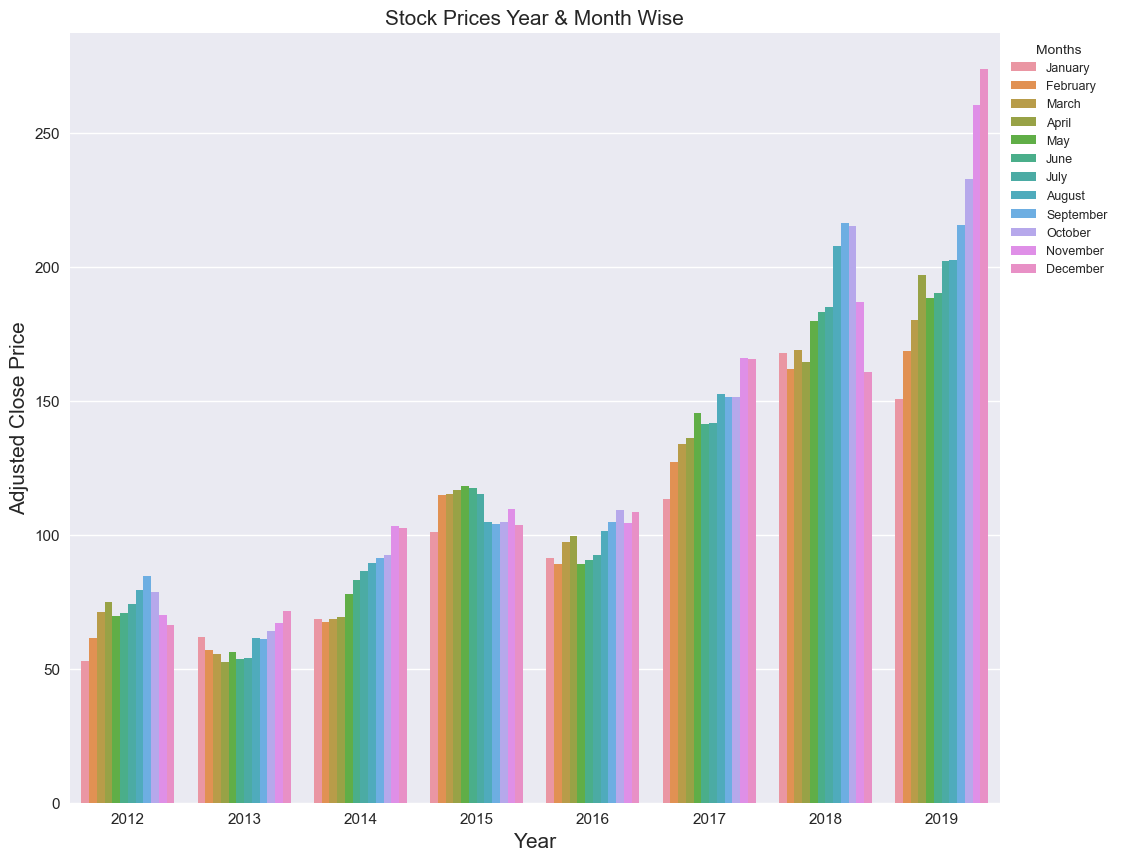

In [31]:
fig, ax = plt.subplots(figsize=(12,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj_Close",hue = 'Month',data=df,ci=None)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left',fontsize=9,bbox_to_anchor=(1,1),title='Months')
ax.tick_params(axis='x',labelsize=11)
ax.tick_params(axis='y',labelsize=11)
ax.set_ylabel('Adjusted Close Price')
plt.show()

In [32]:
monthly_mean=df['Adj_Close'].resample('M').mean()

In [33]:
monthly_df=monthly_mean.to_frame()
monthly_df

Adj_Close
Date                  
2012-01-31   52.907298
2012-02-29   61.424381
2012-03-31   71.292448
2012-04-30   74.810151
2012-05-31   69.708045
2012-06-30   70.928848
2012-07-31   74.200942
2012-08-31   79.595378
2012-09-30   84.499841
2012-10-31   78.690927
2012-11-30   70.223182
2012-12-31   66.264659
2013-01-31   62.001166
2013-02-28   57.155541
2013-03-31   55.349688
2013-04-30   52.584215
2013-05-31   56.195146
2013-06-30   53.660243
2013-07-31   54.116633
2013-08-31   61.454591
2013-09-30   60.950956
2013-10-31   64.068449
2013-11-30   66.921334
2013-12-31   71.453414
2014-01-31   68.617546
2014-02-28   67.571447
2014-03-31   68.484793
2014-04-30   69.494316
2014-05-31   77.804242
2014-06-30   83.072271
2014-07-31   86.453968
2014-08-31   89.356041
2014-09-30   91.356647
2014-10-31   92.402407
2014-11-30  103.307512
2014-12-31  102.577838
2015-01-31  100.962794
2015-02-28  114.843638
2015-03-31  115.404885
2015-04-30  116.614644
2015-05-31  118.356861
2015-06-30  117.575884
2015-07-31  115.302355
2015-08-31  104.720600
2015-09-30  104.237874
2015-10-31  104.757580
2015-11-30  109.590705
2015-12-31  103.690284
2016-01-31   91.348933
2016-02-29   89.269278
2016-03-31   97.292395
2016-04-30   99.598819
2016-05-31   89.084500
2016-06-30   90.707725
2016-07-31   92.523558
2016-08-31  101.552299
2016-09-30  104.635011
2016-10-31  109.212791
2016-11-30  104.453936
2016-12-31  108.472418
2017-01-31  113.438282
2017-02-28  127.238253
2017-03-31  133.985138
2017-04-30  136.147133
2017-05-31  145.432150
2017-06-30  141.439831
2017-07-31  141.887732
2017-08-31  152.563906
2017-09-30  151.386422
2017-10-31  151.586949
2017-11-30  165.996497
2017-12-31  165.699087
2018-01-31  167.736679
2018-02-28  162.059499
2018-03-31  168.895758
2018-04-30  164.383479
2018-05-31  180.027677
2018-06-30  183.271643
2018-07-31  184.913715
2018-08-31  207.807349
2018-09-30  216.531868
2018-10-31  215.334475
2018-11-30  186.944749
2018-12-31  160.725920
2019-01-31  150.843483
2019-02-28  168.558006
2019-03-31  180.112481
2019-04-30  197.035945
2019-05-31  188.428836
2019-06-30  190.349968
2019-07-31  202.431111
2019-08-31  202.738817
2019-09-30  215.853332
2019-10-31  232.974974
2019-11-30  260.569057
2019-12-31  273.780717

In [34]:
monthly_df['Year']=monthly_df.index.year
monthly_df['Month']=monthly_df.index.strftime('%B')
monthly_df['Day']=monthly_df.index.strftime('%A')
monthly_df['Quarter']=monthly_df.index.quarter

monthly_df.loc[monthly_df['Quarter']==1,'Quarter']='Q1'
monthly_df.loc[monthly_df['Quarter']==2,'Quarter']='Q2'
monthly_df.loc[monthly_df['Quarter']==3,'Quarter']='Q3'
monthly_df.loc[monthly_df['Quarter']==4,'Quarter']='Q4'

monthly_df

Adj_Close  Year      Month        Day Quarter
Date                                                      
2012-01-31   52.907298  2012    January    Tuesday      Q1
2012-02-29   61.424381  2012   February  Wednesday      Q1
2012-03-31   71.292448  2012      March   Saturday      Q1
2012-04-30   74.810151  2012      April     Monday      Q2
2012-05-31   69.708045  2012        May   Thursday      Q2
2012-06-30   70.928848  2012       June   Saturday      Q2
2012-07-31   74.200942  2012       July    Tuesday      Q3
2012-08-31   79.595378  2012     August     Friday      Q3
2012-09-30   84.499841  2012  September     Sunday      Q3
2012-10-31   78.690927  2012    October  Wednesday      Q4
2012-11-30   70.223182  2012   November     Friday      Q4
2012-12-31   66.264659  2012   December     Monday      Q4
2013-01-31   62.001166  2013    January   Thursday      Q1
2013-02-28   57.155541  2013   February   Thursday      Q1
2013-03-31   55.349688  2013      March     Sunday      Q1
2013-04-30   52.584215  2013      April    Tuesday      Q2
2013-05-31   56.195146  2013        May     Friday      Q2
2013-06-30   53.660243  2013       June     Sunday      Q2
2013-07-31   54.116633  2013       July  Wednesday      Q3
2013-08-31   61.454591  2013     August   Saturday      Q3
2013-09-30   60.950956  2013  September     Monday      Q3
2013-10-31   64.068449  2013    October   Thursday      Q4
2013-11-30   66.921334  2013   November   Saturday      Q4
2013-12-31   71.453414  2013   December    Tuesday      Q4
2014-01-31   68.617546  2014    January     Friday      Q1
2014-02-28   67.571447  2014   February     Friday      Q1
2014-03-31   68.484793  2014      March     Monday      Q1
2014-04-30   69.494316  2014      April  Wednesday      Q2
2014-05-31   77.804242  2014        May   Saturday      Q2
2014-06-30   83.072271  2014       June     Monday      Q2
2014-07-31   86.453968  2014       July   Thursday      Q3
2014-08-31   89.356041  2014     August     Sunday      Q3
2014-09-30   91.356647  2014  September    Tuesday      Q3
2014-10-31   92.402407  2014    October     Friday      Q4
2014-11-30  103.307512  2014   November     Sunday      Q4
2014-12-31  102.577838  2014   December  Wednesday      Q4
2015-01-31  100.962794  2015    January   Saturday      Q1
2015-02-28  114.843638  2015   February   Saturday      Q1
2015-03-31  115.404885  2015      March    Tuesday      Q1
2015-04-30  116.614644  2015      April   Thursday      Q2
2015-05-31  118.356861  2015        May     Sunday      Q2
2015-06-30  117.575884  2015       June    Tuesday      Q2
2015-07-31  115.302355  2015       July     Friday      Q3
2015-08-31  104.720600  2015     August     Monday      Q3
2015-09-30  104.237874  2015  September  Wednesday      Q3
2015-10-31  104.757580  2015    October   Saturday      Q4
2015-11-30  109.590705  2015   November     Monday      Q4
2015-12-31  103.690284  2015   December   Thursday      Q4
2016-01-31   91.348933  2016    January     Sunday      Q1
2016-02-29   89.269278  2016   February     Monday      Q1
2016-03-31   97.292395  2016      March   Thursday      Q1
2016-04-30   99.598819  2016      April   Saturday      Q2
2016-05-31   89.084500  2016        May    Tuesday      Q2
2016-06-30   90.707725  2016       June   Thursday      Q2
2016-07-31   92.523558  2016       July     Sunday      Q3
2016-08-31  101.552299  2016     August  Wednesday      Q3
2016-09-30  104.635011  2016  September     Friday      Q3
2016-10-31  109.212791  2016    October     Monday      Q4
2016-11-30  104.453936  2016   November  Wednesday      Q4
2016-12-31  108.472418  2016   December   Saturday      Q4
2017-01-31  113.438282  2017    January    Tuesday      Q1
2017-02-28  127.238253  2017   February    Tuesday      Q1
2017-03-31  133.985138  2017      March     Friday      Q1
2017-04-30  136.147133  2017      April     Sunday      Q2
2017-05-31  145.432150  2017        May  Wednesday      Q2
2017-06-30  141.439831  2017       June     Friday      Q2
2

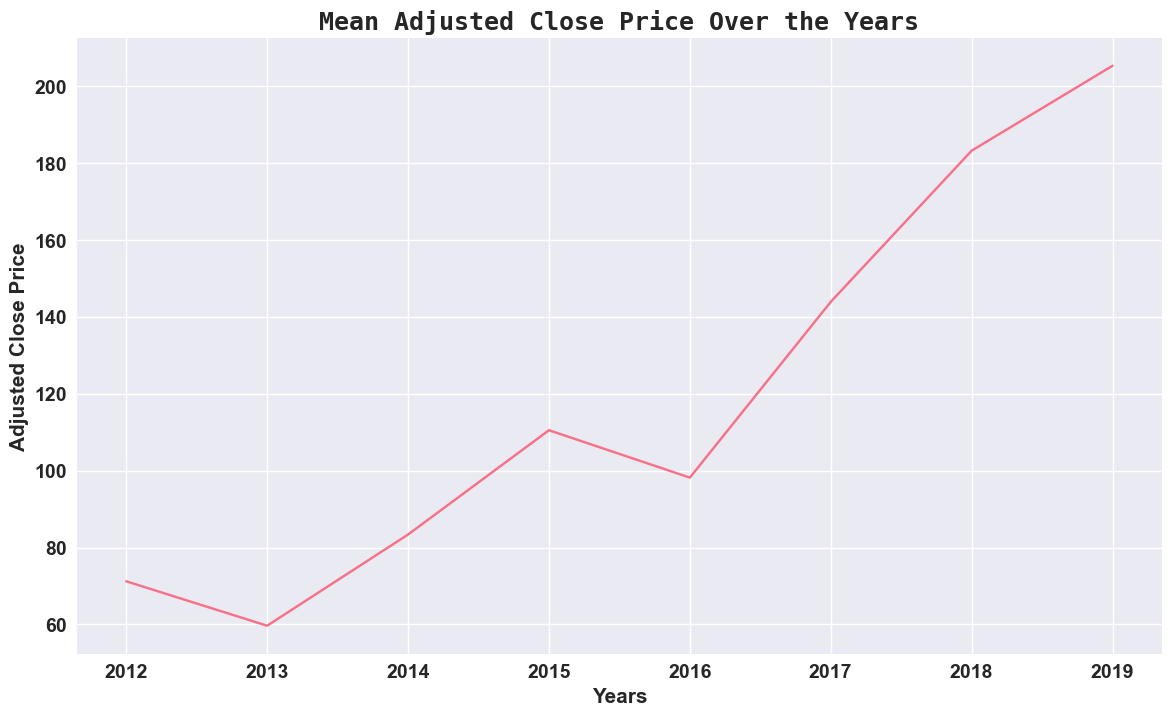

In [35]:
plt.figure(figsize=(14,8))
ax=sns.lineplot(data=monthly_df,x='Year',y='Adj_Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.title('Mean Adjusted Close Price Over the Years',family='monospace',fontsize=18,fontweight='bold')
ax.set_xlabel('Years',fontweight='bold')
ax.set_ylabel('Adjusted Close Price',fontweight='bold')
plt.show()

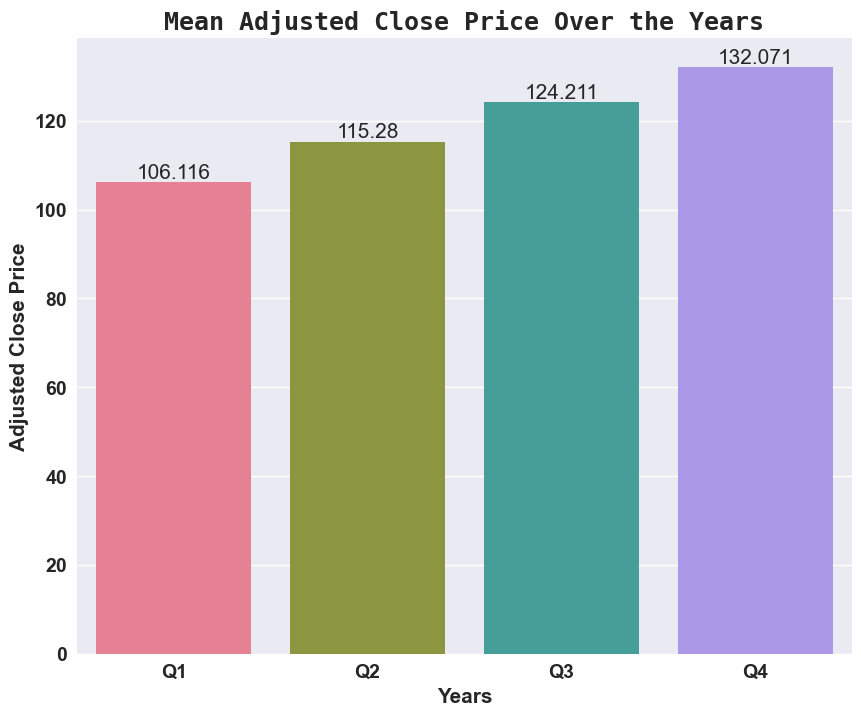

In [36]:
plt.figure(figsize=(10,8))
ax=sns.barplot(data=monthly_df,x='Quarter',y='Adj_Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.title('Mean Adjusted Close Price Over the Years',family='monospace',fontsize=18,fontweight='bold')
ax.set_xlabel('Years',fontweight='bold')
ax.set_ylabel('Adjusted Close Price',fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

## <span style=color:magenta>We see that the average price increased over _Quarters_.</span>

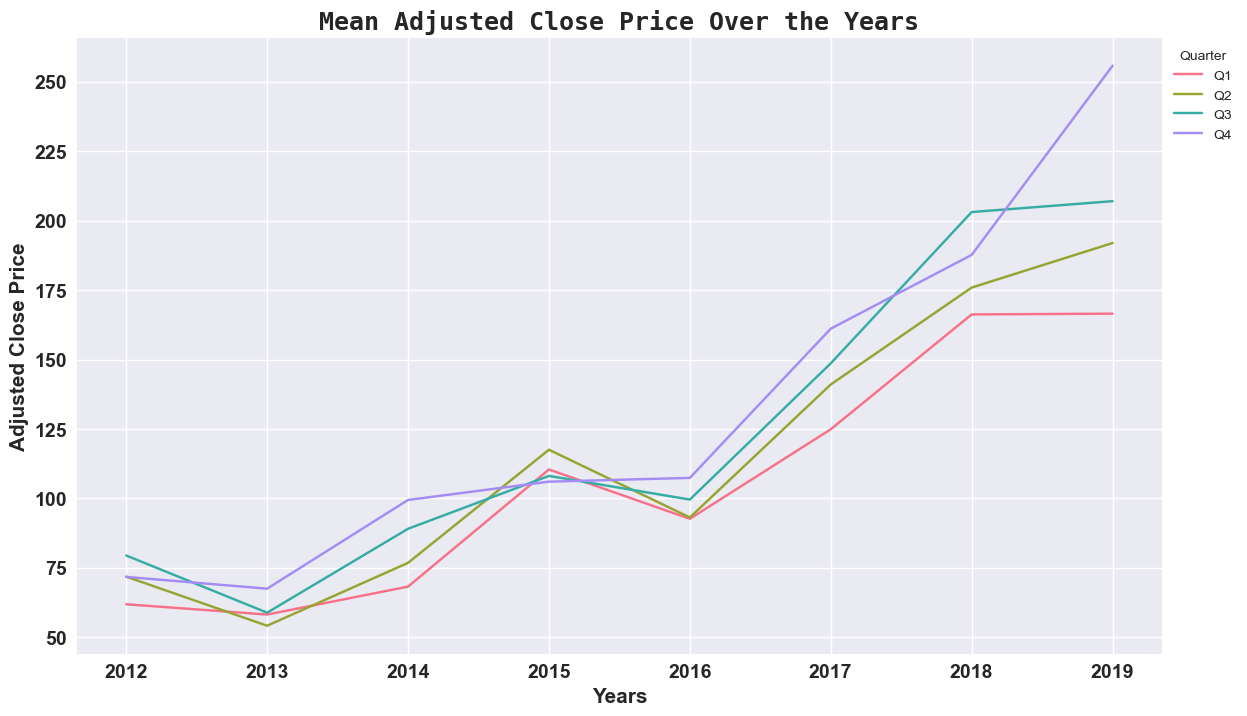

In [37]:
plt.figure(figsize=(14,8))
ax=sns.lineplot(data=monthly_df,x='Year',y='Adj_Close',palette='husl',hue='Quarter',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.title('Mean Adjusted Close Price Over the Years',family='monospace',fontsize=18,fontweight='bold')
ax.set_xlabel('Years',fontweight='bold')
ax.set_ylabel('Adjusted Close Price',fontweight='bold')
plt.legend(bbox_to_anchor=(1,1),title='Quarter')
plt.show()

## <span style=color:magenta>We can see that over the years the mean of _Adjusted Close Price_ is increasing over the years in _Q4_. After year _2016_ the Price increased for all the Quarters. After year _2018_ the Price stagnated for the _Q1_.</span>

In [38]:
# Yearly subseries plot

alt.Chart(monthly_df).mark_line(point=True).encode(
    x='Quarter',
    y='Adj_Close',
    column='Year',
    tooltip=['Year','Adj_Close']).properties(
    title='Prices: Yearly Subseries plot',
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

In [39]:
alt.Chart(monthly_df).mark_line(point=True).encode(
    x='Month',
    y='Adj_Close',
    column='Year',
    tooltip=['Year','Adj_Close']).properties(
    title='Prices: Yearly Subseries plot',
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

In [40]:
alt.Chart(monthly_df).mark_line(point=True).encode(
    x='Day',
    y='Adj_Close',
    column='Quarter',
    tooltip=['Year','Adj_Close']).properties(
    title='Prices: Quarterly Subseries plot',
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

# <span style=color:purple>Converting Prices to returns</span>

## <span style=color:blue>There are two types of returns:</span>

### <span style=color:red>1. _Simple returns:_</span> <span style=color:magenta>They aggregate over assets; the simple return of a portfolio is the weighted sum of the returns of the individual assets in the portfolio. Simple returns are defined as:</span>

$R_t=\frac{P_t-P_{t-1}}{P_{t-1}}=\frac{P_t}{P_{t-1}}-1$
        
### <span style=color:red>2. _Log returns:_</span> <span style=color:magenta>They aggregate over time; it is easier to understand with the help of an example—the log return for a given month is the sum of the log returns of the days within that month. Log returns are defined as:</span>

$r_t=log(\frac{P_t}{P_{t-1}})=log(P_{t})-log(P_{t-1})$

#### <span style=color:magenta>where, $P_{t}$ is the price of an asset in time $t$.</span>

In [41]:
pd.options.plotting.backend='matplotlib'

In [42]:
df=df.asfreq('C',method='pad')
df['simple_rtn']=df.Adj_Close.pct_change()
df['log_rtn']=np.log(df.Adj_Close/df.Adj_Close.shift(1))

In [43]:
df

Adj_Close  Year     Month  simple_rtn   log_rtn
Date                                                        
2012-01-03   50.765709  2012   January         NaN       NaN
2012-01-04   51.038536  2012   January    0.005374  0.005360
2012-01-05   51.605175  2012   January    0.011102  0.011041
2012-01-06   52.144630  2012   January    0.010454  0.010399
2012-01-09   52.061932  2012   January   -0.001586 -0.001587
...                ...   ...       ...         ...       ...
2019-12-24  282.322266  2019  December    0.000951  0.000950
2019-12-25         NaN  2019  December    0.000000       NaN
2019-12-26  287.923645  2019  December    0.019840       NaN
2019-12-27  287.814392  2019  December   -0.000379 -0.000380
2019-12-30  289.522614  2019  December    0.005935  0.005918

[2085 rows x 5 columns]

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Log Returns (%)')]

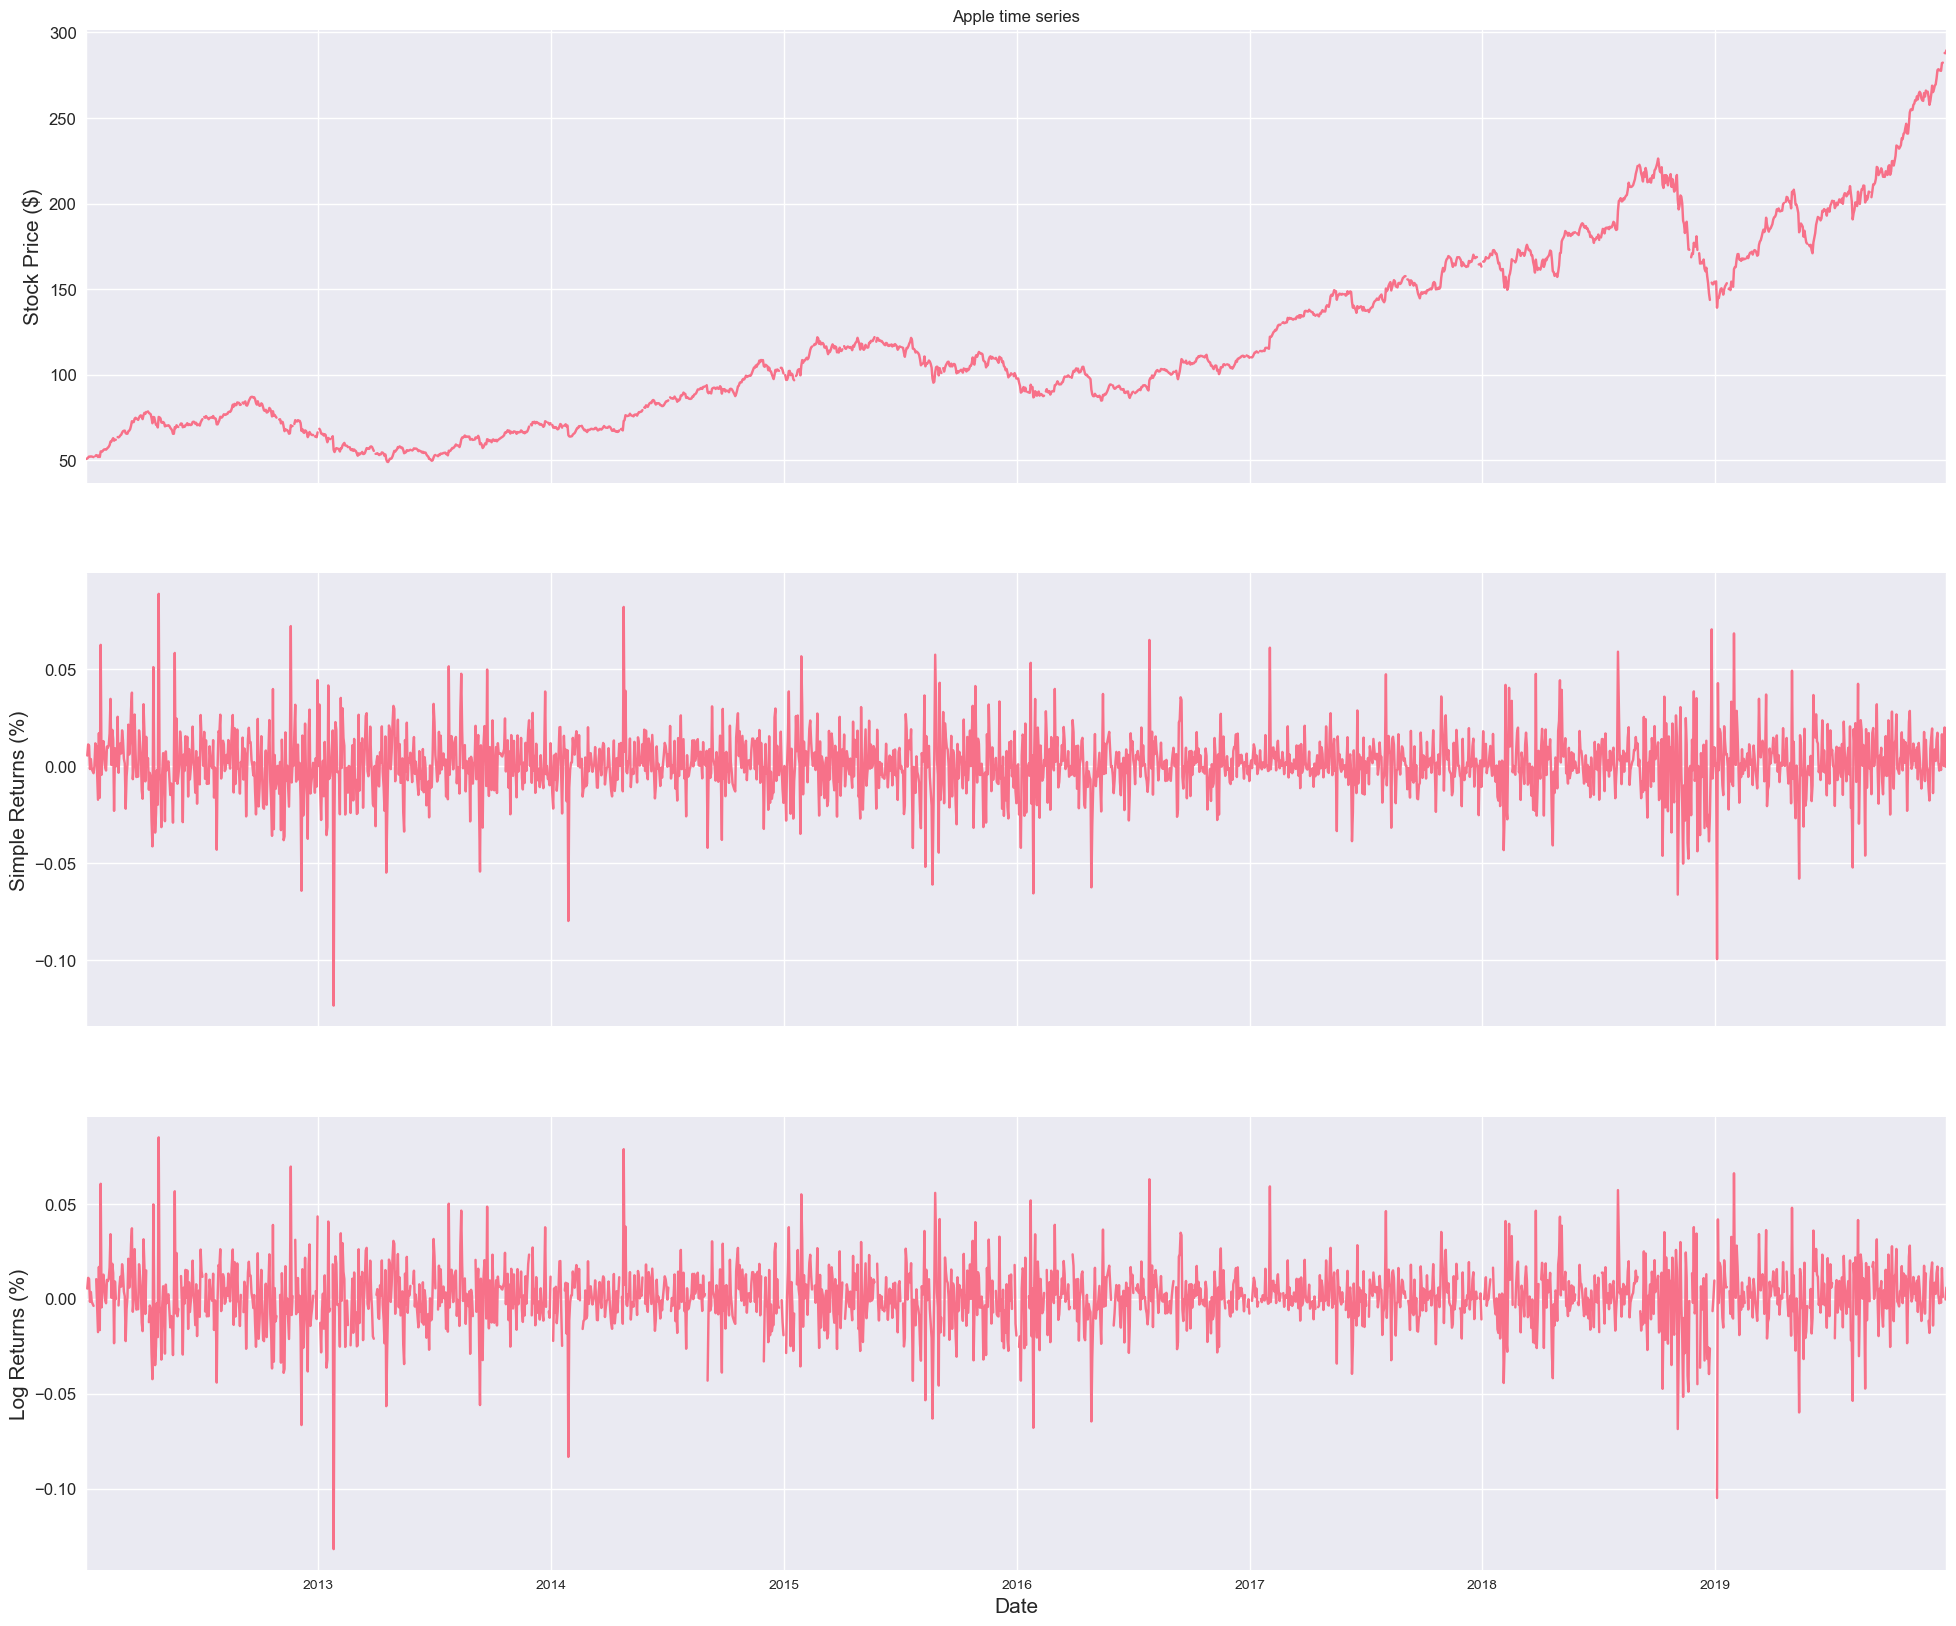

In [44]:
fig,ax=plt.subplots(3,1,figsize=(24,20),sharex=True)

df.Adj_Close.plot(ax=ax[0])
ax[0].set(title='Apple time series',ylabel='Stock Price ($)')

df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Simple Returns (%)')

df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel='Date',ylabel='Log Returns (%)')

In [45]:
df.drop(['simple_rtn','log_rtn'],axis=1,inplace=True)